In [31]:
# </path/to>/build/bin/hipace <input>

import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
from scipy import constants
# from openpmd_viewer import OpenPMDTimeSeries
# from openpmd_viewer.addons import LpaDiagnostics

from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')


# d = 'none'
d = 'behind'
# d = 'front'
# d = 'frontStep'

if d == 'none':
    r = False
else:
    r = True

n = False

p = f'/Users/max/HiPACE/recovery/non-filament/h5/{d}/'
ip = f'/Users/max/HiPACE/recovery/non-filament/insitu/{d}/'
data = defs.Functions(path = p, insitu_path = ip, n0 = 7.8e15, iteration = 0, normalized = n, recovery = r)

# data.customCMAP()

In [22]:
print(f'Drive : {data.transverse_u_std_matched(data.driveInsitu, n, 5e-6)}\nWitness: {data.transverse_u_std_matched(data.witnessInsitu, n, 2e-6)}\nRecovery: {data.transverse_u_std_matched(data.recoveryInsitu, n, 5e-6)}')

Drive : 4.101896838109489
Witness: 1.6441474729788008
Recovery: 4.112249483655955


In [32]:
print(f'(Quick) Energy Transfer Efficiency : {data.quickEfficiency(iteration = data.iteration):.2f} %')

(Quick) Energy Transfer Efficiency : 44.95 %


In [12]:
diag.read_file(ip + 'reduced_electrons.0000.txt')['Np'][0] # .dtype.names

array([26112100, 26112100, 26112100, ..., 26112100, 26112100, 26112100],
      dtype=int32)

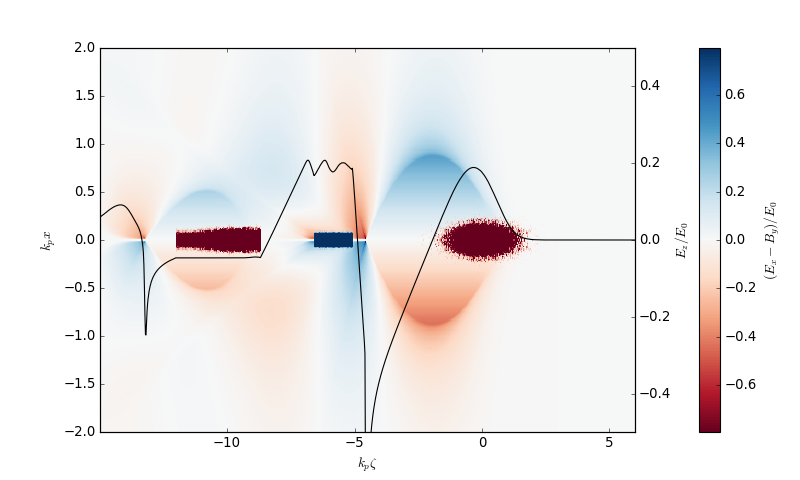

In [33]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.ExmBy.T / data.E0, cmap = 'RdBu') #, vmin = -1, vmax = 1)

# plt.scatter(kp * zd, kp * xd, s = .02, color = 'darkred', label = '$e^-$ Drive Bunch')
# plt.scatter(kp * zw, kp * xw, s = .02, color = 'b', label = '$e^+$ Witness Bunch')
# plt.scatter(kp * zr, kp * xr, s = .02, color = 'g', label = '$e^-$ Recovery Bunch')

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.kp * data.info.zmin, data.kp * data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-2, 2)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

ax2 = plt.twinx()
ax2.plot(data.kp * data.info.z, data.Ez / data.E0, color = 'black')
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$(E_x - B_y)/E_0 $')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

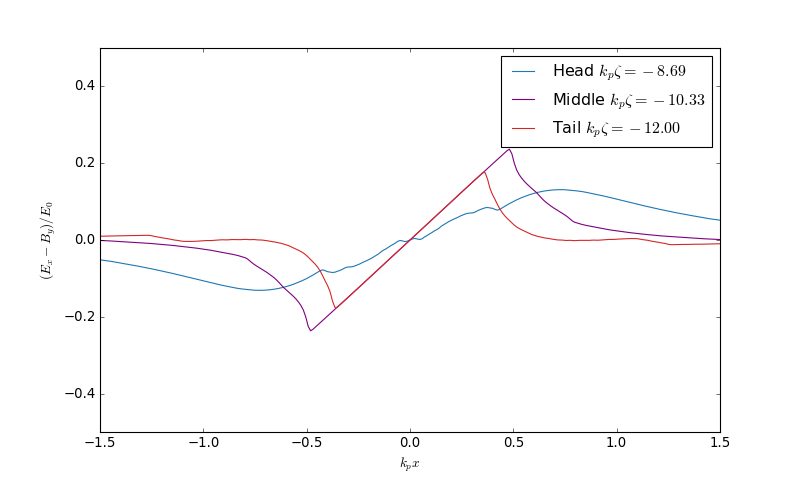

In [35]:
zAx = diag.z_axis(data.driveInsitu)
beam = zAx[(data.recoveryInsitu['sum(w)']!=0)[0]]
# print(zAx[612:734])
kpz = -11.65 * data.kp_inv # -14.14160156 # -15.125
choice = np.argmin(np.abs(zAx - kpz))
head = np.argmin(np.abs(zAx - max(beam)))
tail = np.argmin(np.abs(zAx - min(beam)))
mid = head - (head - tail)//2
# idx = np.argmin(np.abs(zAx-kpz))
# print(idx, zAx[idx])

# WFSlice = data.ts.get_field(field = 'ExmBy', iteration = data.iteration, slice_across = 'z', slice_relative_position = (kpz + abs(data.info.z[len(data.info.z)//2]))/((data.info.zmax - data.info.zmin)/2))[0]

plt.close()
plt.figure(figsize = (10, 6))
# plt.plot(data.info.x, WFSlice, 'k', linewidth = 2)
plt.plot(data.kp * data.info.x, data.ExmBy[head] / data.E0, 'tab:blue', ls = '-', label = f'Head $k_p\zeta = {data.kp * zAx[head]:.2f}$')
plt.plot(data.kp * data.info.x, data.ExmBy[mid] / data.E0, 'purple', ls = '-', label = f'Middle $k_p\zeta = {data.kp * zAx[mid]:.2f}$')
plt.plot(data.kp * data.info.x, data.ExmBy[tail] / data.E0, 'tab:red', ls = '-', label = f'Tail $k_p\zeta = {data.kp * zAx[tail]:.2f}$')
# plt.plot(data.kp * data.info.x, data.ExmBy[choice] / data.E0, 'm', ls = '-', label = f'$k_p\zeta = {data.kp * zAx[choice]:.2f}$')
plt.ylabel('$(E_x-B_y)/E_0$')
plt.xlabel('$k_px$')
# plt.title(f'$k_p\zeta = {kpz}$')
plt.ylim(-.5, .5)
# plt.xlim(data.info.xmin, data.info.xmax)
plt.xlim(-1.5, 1.5)
plt.legend(loc = 'best')
# plt.savefig('/Users/max/HiPACE/recovery/images/filamentFrontRecoTransverse.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
data.witnessInsitu["time"]*constants.c

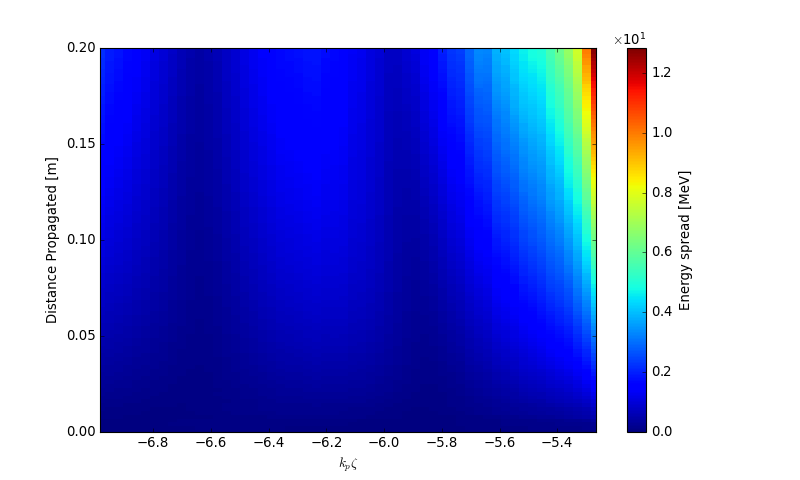

In [134]:
zAx = diag.z_axis(data.witnessInsitu) * data.kp
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(zAx, data.witnessInsitu["time"] * constants.c, diag.energy_spread_eV(data.witnessInsitu, per_slice = True) / 1e6)

plt.ylim(0, .2)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Energy spread [MeV]')
plt.show()

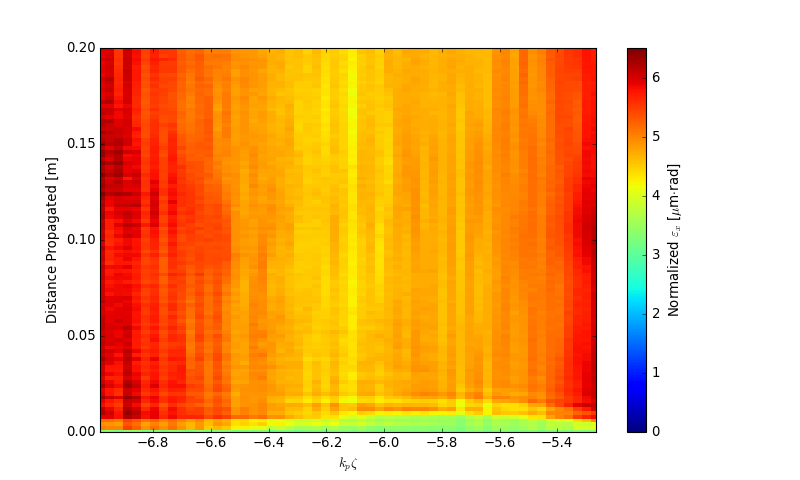

In [136]:
zAx = diag.z_axis(data.witnessInsitu) * data.kp
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(zAx, data.witnessInsitu["time"] * constants.c, diag.emittance_x(data.witnessInsitu) * 1e6)

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Normalized $\\varepsilon_x$ [$\mu$m$\cdot$rad]')
plt.show()

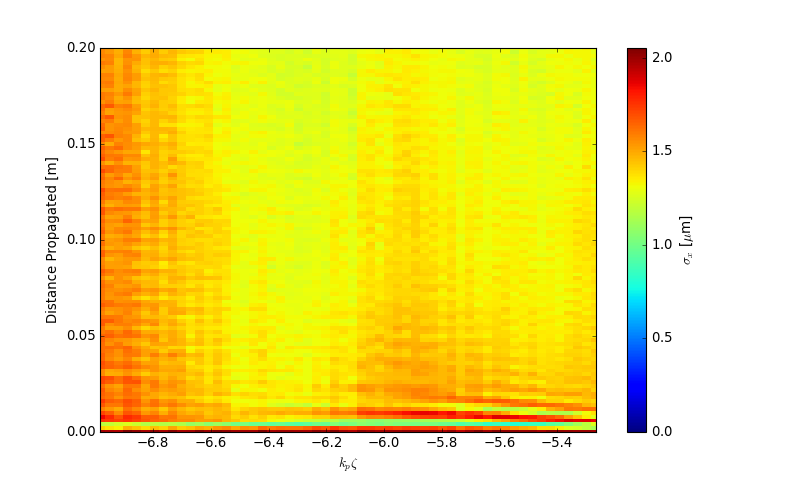

In [137]:
zAx = diag.z_axis(data.witnessInsitu) * data.kp
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(zAx, data.witnessInsitu["time"] * constants.c, diag.position_std(data.witnessInsitu) * 1e6)

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('$\sigma_x$ [$\mu$m]')
plt.show()

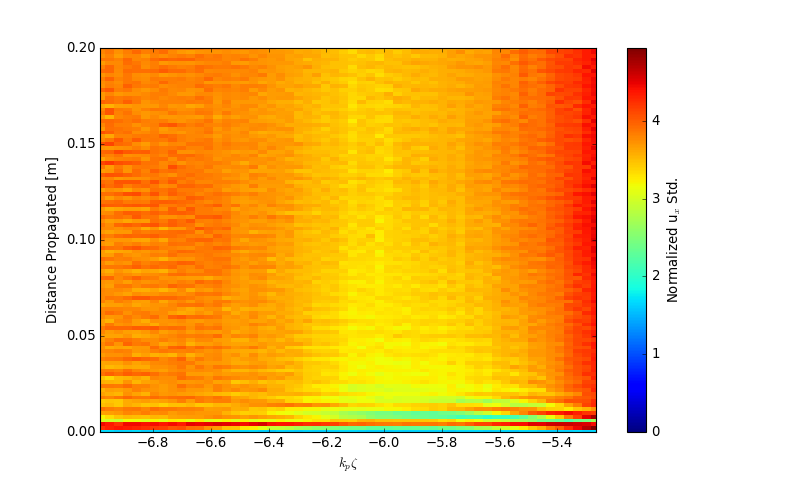

In [139]:
zAx = diag.z_axis(data.witnessInsitu) * data.kp
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(zAx, data.witnessInsitu["time"] * constants.c, diag.normalized_momentum_std(data.witnessInsitu))

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Normalized u$_x$ Std.')
plt.show()

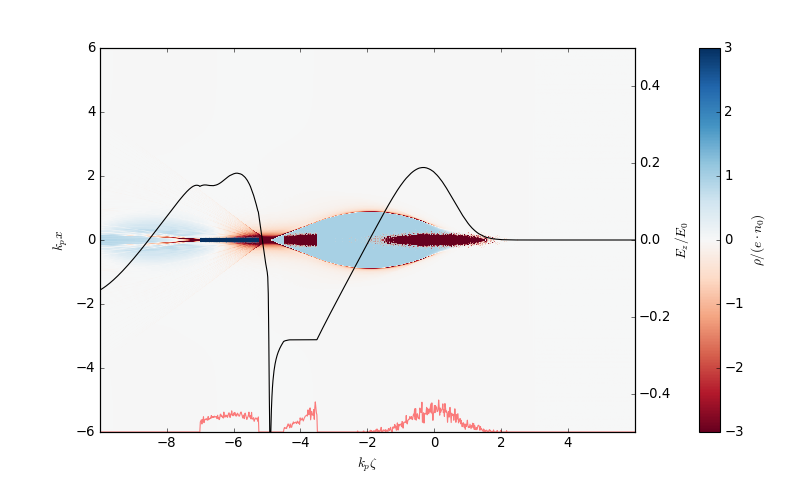

In [81]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.rho.T / (constants.e * data.n0 * 1e6), cmap = 'RdBu', vmin = -3, vmax = 3)

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.kp * data.info.zmin, data.kp * data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

ax2 = plt.twinx()
ax2.plot(data.kp * data.info.z, data.Ez / data.E0, color = 'black')
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

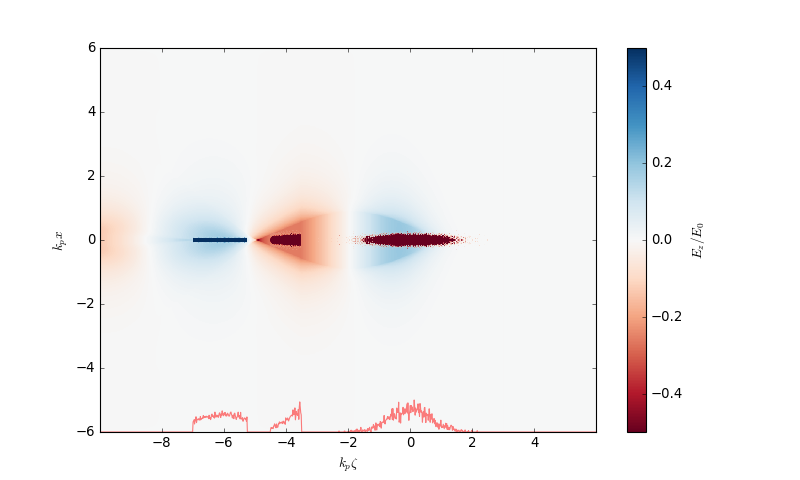

In [47]:
Ez = data.ts.get_field(field = 'Ez', iteration = data.iteration)[0]

plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, Ez.T / data.E0, cmap = 'RdBu', vmin = -.5, vmax = .5)

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.kp * data.info.zmin, data.kp * data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$E_z/E_0$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

-4.55126953125 -8.345214843749998 -6.827636718749999


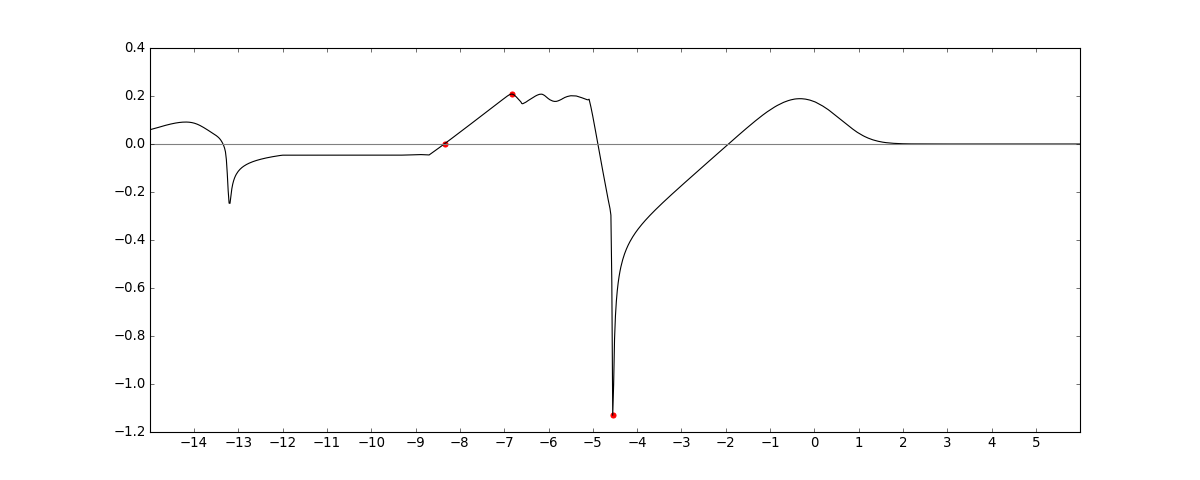

In [7]:
m = (data.info.z > -12 * data.kp_inv) & (data.info.z < 0 * data.kp_inv)
# m = (data.info.z > -23) & (data.info.z < -20)
recoveryPlacement = np.argmin(data.Ez[m])
wp = np.argmax(data.Ez[m])
minLoc = data.kp * data.info.z[m][recoveryPlacement]
maxLoc = data.kp * data.info.z[m][wp]
# mZero = (data.info.z > minLoc) & (data.info.z < 0)
mZero = (data.info.z > minLoc) & (data.info.z < 0)
zeroIdx = np.argmin(abs(data.Ez[mZero]))
zeroLoc = data.kp * data.info.z[mZero][zeroIdx]
print(minLoc, zeroLoc, maxLoc)
# print(zeroLoc, minLoc)
# print(data.kp *data.info.z[(abs(data.Ez) < 5e-6) & (data.info.z < 0.)])

plt.close()
plt.figure(figsize = (15, 6))
plt.plot(data.kp * data.info.z, data.Ez / data.E0, color = 'k')
plt.scatter(np.array([minLoc, zeroLoc, maxLoc]), np.array([data.Ez[m][recoveryPlacement], data.Ez[mZero][zeroIdx], data.Ez[m][wp]]) / data.E0, color = 'r')
plt.hlines(0, data.kp * data.info.z[0], data.kp * data.info.z[-1], color = 'gray', linestyle = '-')
# plt.vlines([-13.25, -17.], -1, 1, color = 'gray', linestyle = '--')
# plt.vlines(data.kp *data.info.z[(abs(data.Ez) < 5e-6) & (data.info.z < 0.)], -1.25, 1.25, color = 'gray', linestyle = '--')
plt.xticks(np.round(np.arange(data.kp * data.info.zmin, data.kp * data.info.zmax)))
plt.xlim(data.kp * data.info.zmin, data.kp * data.info.zmax)
# plt.ylim(-1.25, 1.25)
plt.show()